# Machine Learning Homework2 Heart Diseace Prediction

### 作業說明

1. 資料清理與視覺化圖表
2. 敘述性統計分析
3. 特徵相關性分析
4. 資料分割與建置4個分類模型
  * Logistic regression
  * SVM
  * Random forest
  * KNN
5. 綜合比較4個模型的分類結果與分析討論

### 1. 資料清理與視覺化圖表

#### 資料清理

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heartData = pd.read_csv("path/HW2_heart.csv")

In [ ]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
heartDataClassification = heartData.select_dtypes(include=['object'])

for classificationIndex in heartDataClassification.columns:
  print(heartDataClassification['%s'%(classificationIndex)].astype('category').value_counts(), "\n")

No     292422
Yes     27373
Name: HeartDisease, dtype: int64 

No     187887
Yes    131908
Name: Smoking, dtype: int64 

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64 

No     307726
Yes     12069
Name: Stroke, dtype: int64 

No     275385
Yes     44410
Name: DiffWalking, dtype: int64 

Female    167805
Male      151990
Name: Sex, dtype: int64 

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64 

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64 

No                         269653
Yes                 

In [ ]:
# AgeCategory
heartData.loc[heartData['AgeCategory'] == "80 or older", 'AgeCategory'] = "80↑"
# Diabetic
heartData.loc[heartData['Diabetic'] == "No, borderline diabetes", 'Diabetic'] = "No"
heartData.loc[heartData['Diabetic'] == "Yes (during pregnancy)", 'Diabetic'] = "Yes"
# Race
heartData.loc[heartData['Race'] == "American Indian/Alaskan Native", 'Race'] = "AmericanNative"

In [ ]:
# GenHealth
heartData.loc[heartData['GenHealth'] == "Excellent", 'GenHealth'] = 100
heartData.loc[heartData['GenHealth'] == "Very good", 'GenHealth'] = 70
heartData.loc[heartData['GenHealth'] == "Good", 'GenHealth'] = 50
heartData.loc[heartData['GenHealth'] == "Fair", 'GenHealth'] = 30
heartData.loc[heartData['GenHealth'] == "Poor", 'GenHealth'] = 10
heartData['GenHealth'] = heartData['GenHealth'].astype('float64')
# AgeCategory
heartData['AgeAverage'] = heartData['AgeCategory']
heartData.loc[heartData['AgeAverage'] == "80↑", 'AgeAverage'] = 85
heartData.loc[heartData['AgeAverage'] == "75-79", 'AgeAverage'] = 77
heartData.loc[heartData['AgeAverage'] == "70-74", 'AgeAverage'] = 72
heartData.loc[heartData['AgeAverage'] == "65-69", 'AgeAverage'] = 67
heartData.loc[heartData['AgeAverage'] == "60-64", 'AgeAverage'] = 62
heartData.loc[heartData['AgeAverage'] == "55-59", 'AgeAverage'] = 57
heartData.loc[heartData['AgeAverage'] == "50-54", 'AgeAverage'] = 52
heartData.loc[heartData['AgeAverage'] == "45-49", 'AgeAverage'] = 47
heartData.loc[heartData['AgeAverage'] == "40-44", 'AgeAverage'] = 42
heartData.loc[heartData['AgeAverage'] == "35-39", 'AgeAverage'] = 37
heartData.loc[heartData['AgeAverage'] == "30-34", 'AgeAverage'] = 32
heartData.loc[heartData['AgeAverage'] == "25-29", 'AgeAverage'] = 37
heartData.loc[heartData['AgeAverage'] == "18-24", 'AgeAverage'] = 21
heartData['AgeAverage'] = heartData['AgeAverage'].astype('float64')

In [ ]:
# Yes/No to boolean
boolColumnList = ['HeartDisease', 'SkinCancer', 'KidneyDisease', 'Asthma', 'PhysicalActivity', 'Diabetic', 'DiffWalking', 'Stroke', 'AlcoholDrinking', 'Smoking']
for columnName in boolColumnList:
  heartData.loc[heartData[columnName] == "No", columnName] = 0
  heartData.loc[heartData[columnName] == "Yes", columnName] = 1
  heartData[columnName] = heartData[columnName].astype('bool')

In [ ]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  bool   
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  bool   
 3   AlcoholDrinking   319795 non-null  bool   
 4   Stroke            319795 non-null  bool   
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  bool   
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  bool   
 12  PhysicalActivity  319795 non-null  bool   
 13  GenHealth         319795 non-null  float64
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  bool   
 16  KidneyDisease     31

#### 視覺化圖表

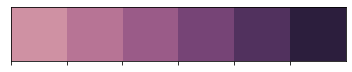

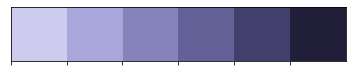

In [ ]:
purpleOuO = ["#CF91A3", "#B77495", "#9A5B88", "#764476", "#51315E", "#2C1E3D"]
sns.palplot(sns.color_palette(purpleOuO))
blueOuO = [ "#CDCBEE", "#A9A6DB", "#8682BB", "#646098", "#423F6C", "#201E39"]
sns.palplot(sns.color_palette(blueOuO))

def chartReset():
  sns.set()
  sns.set_palette(sns.color_palette(purpleOuO))
  sns.set_style("whitegrid")
  sns.set_context("talk")
  plt.figure(figsize=(15, 10))

In [ ]:
# Graph Only
heartDiseaceFilt = (heartData['HeartDisease']==1)
heartDiseaceFiltData = heartData.loc[heartDiseaceFilt]
heartDiseaceFiltData.loc[heartData['Sex'] == "Male", 'Sex'] = "Male with Heart Disease"
heartDiseaceFiltData.loc[heartData['Sex'] == "Female", 'Sex'] = "Female with Heart Disease"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


##### AgeCategory & Sex

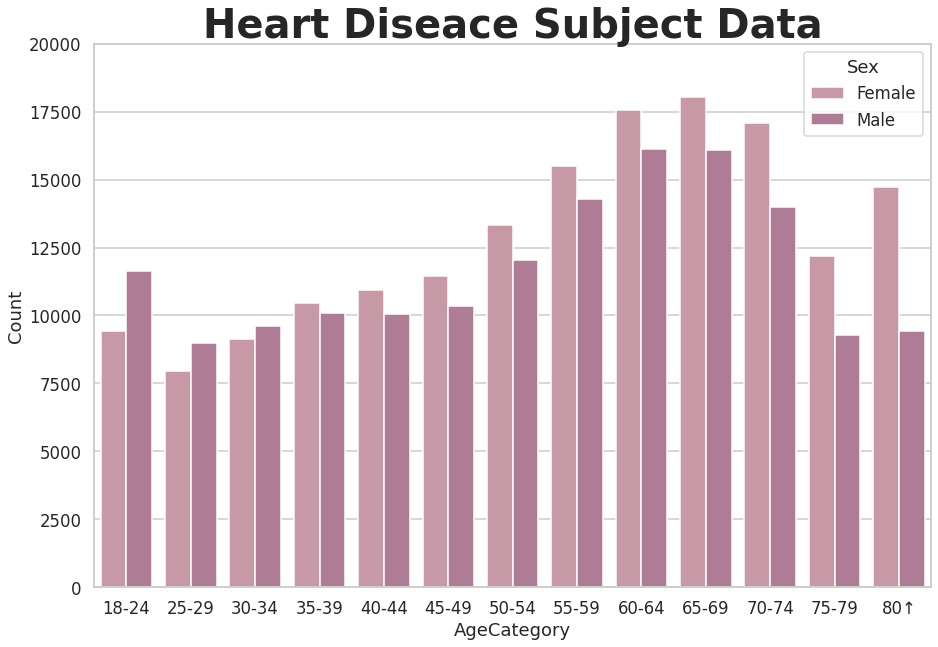

In [ ]:
chartReset()
sns.countplot(x="AgeCategory", hue="Sex", data=heartData, 
      order=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80↑']).set_ylim(0, 20000)
plt.title("Heart Diseace Subject Data", fontsize=40, fontweight='bold')
plt.xlabel("AgeCategory")
plt.ylabel("Count")
plt.show()

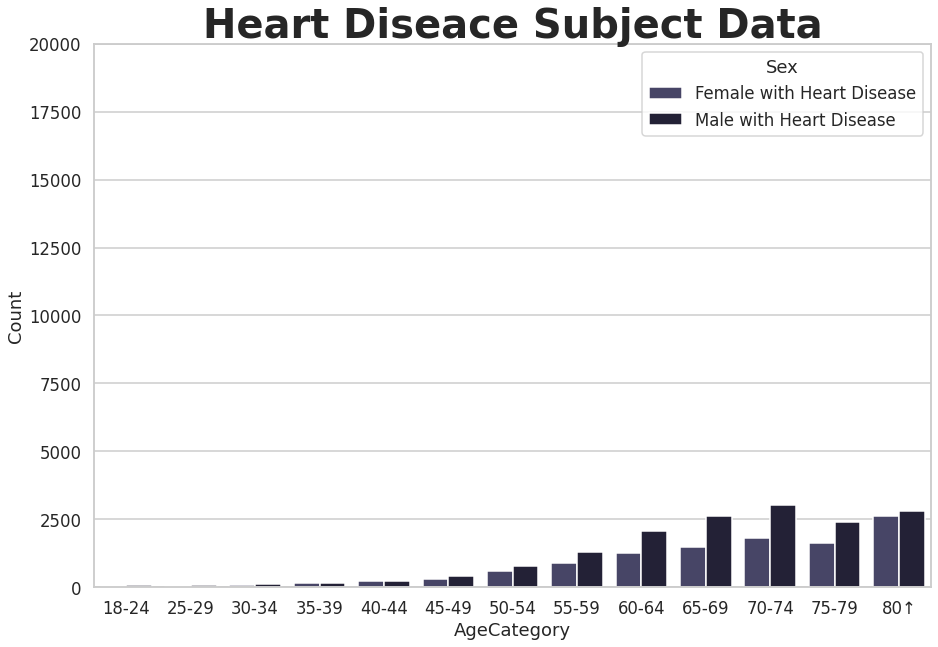

In [ ]:
chartReset()
sns.countplot(x="AgeCategory", hue="Sex", data=heartDiseaceFiltData, 
      order=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80↑'], 
      palette=blueOuO[4:]).set_ylim(0, 20000)
plt.title("Heart Diseace Subject Data", fontsize=40, fontweight='bold')
plt.xlabel("AgeCategory")
plt.ylabel("Count")
plt.show()

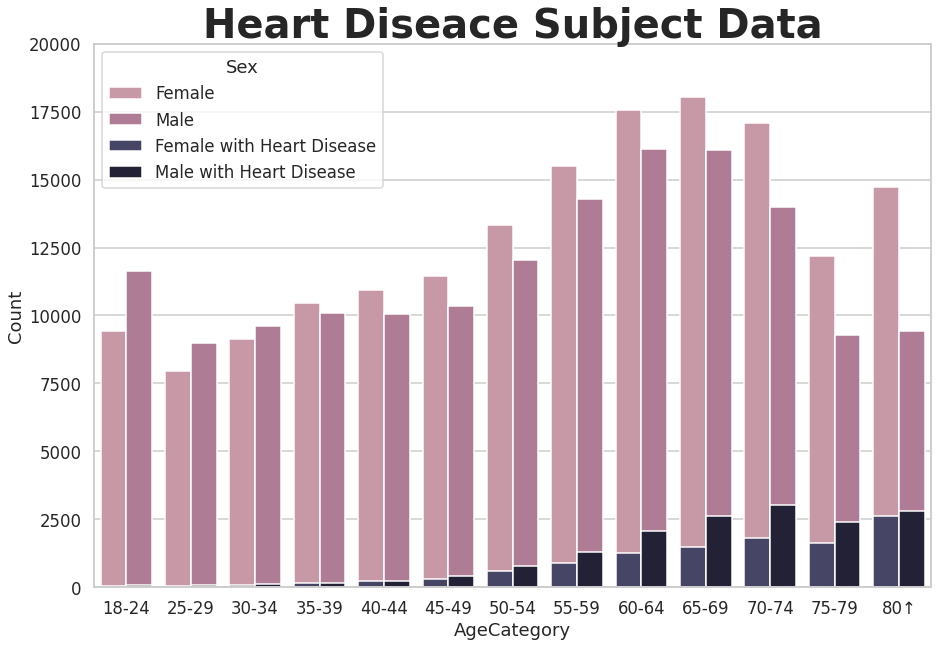

In [ ]:
chartReset()
sns.countplot(x="AgeCategory", hue="Sex", data=heartData, 
      order=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80↑'], 
      palette=purpleOuO).set_ylim(0, 20000)
sns.countplot(x="AgeCategory", hue="Sex", data=heartDiseaceFiltData, 
      order=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80↑'], 
      palette=blueOuO[4:]).set_ylim(0, 20000)
plt.title("Heart Diseace Subject Data", fontsize=40, fontweight='bold')
plt.xlabel("AgeCategory")
plt.ylabel("Count")
plt.show()

##### AgeCategory & Race

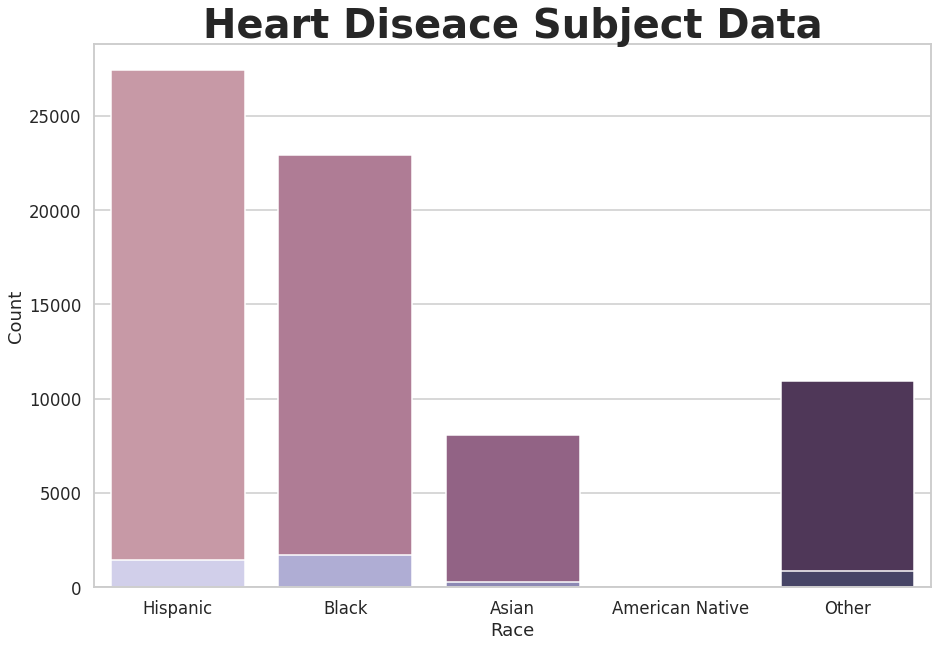

In [ ]:
chartReset()
sns.countplot(x="Race", data=heartData, 
      order=[
          # "White", 
          "Hispanic", "Black", "Asian", "American Native", "Other"
      ], 
      palette=purpleOuO)
sns.countplot(x="Race", data=heartDiseaceFiltData, 
      order=[
          # "White", 
          "Hispanic", "Black", "Asian", "American Native", "Other"
      ], 
      palette=blueOuO)
plt.title("Heart Diseace Subject Data", fontsize=40, fontweight='bold')
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

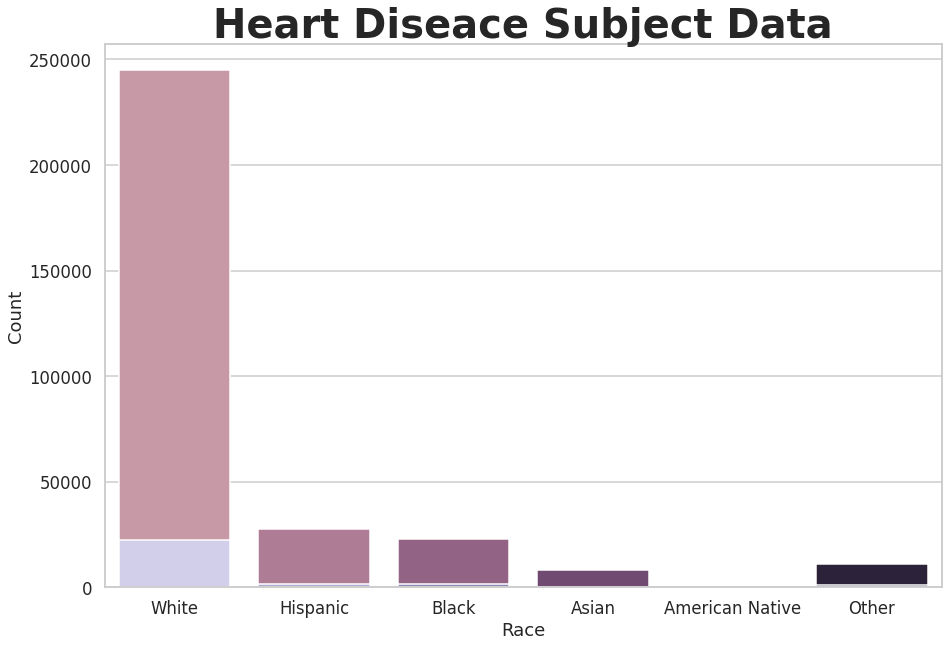

In [ ]:
chartReset()
sns.countplot(x="Race", data=heartData, 
      order=[
          "White", 
          "Hispanic", "Black", "Asian", "American Native", "Other"
      ], 
      palette=purpleOuO)
sns.countplot(x="Race", data=heartDiseaceFiltData, 
      order=[
          "White", 
          "Hispanic", "Black", "Asian", "American Native", "Other"
      ], 
      palette=blueOuO)
plt.title("Heart Diseace Subject Data", fontsize=40, fontweight='bold')
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

### 2. 敘述性統計分析

In [ ]:
heartData.describe()

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,AgeAverage
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,63.990713,7.097075,55.263575
std,6.356100,7.95085,7.955235,23.855158,1.436007,17.627834
min,12.020000,0.00000,0.000000,10.000000,1.000000,21.000000
25%,24.030000,0.00000,0.000000,50.000000,6.000000,42.000000
50%,27.340000,0.00000,0.000000,70.000000,7.000000,57.000000
75%,31.420000,2.00000,3.000000,70.000000,8.000000,67.000000
max,94.850000,30.00000,30.000000,100.000000,24.000000,85.000000


### 3. 特徵相關性分析

In [ ]:
heartData.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeAverage
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.174782,-0.100030,-0.232412,0.008327,0.041444,0.145197,0.093317,0.235162
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.200443,-0.150616,-0.232415,-0.051822,0.092345,0.050768,-0.033644,-0.010566
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.055544,-0.097174,-0.172787,-0.030336,0.024149,0.034920,0.033977,0.125686
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.057786,0.017487,0.028694,-0.005065,-0.002202,-0.028280,-0.005702,-0.059352
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.104467,-0.079455,-0.159573,0.011900,0.038866,0.091167,0.048116,0.138791
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.153975,-0.232283,-0.451552,-0.061387,0.117907,0.142197,0.041700,0.108625
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,0.029709,-0.095808,-0.230340,-0.119717,0.114008,0.037281,-0.033412,-0.154597
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.209255,-0.278524,-0.391405,-0.022216,0.103222,0.153064,0.064840,0.244146
Diabetic,0.174782,0.200443,0.055544,-0.057786,0.104467,0.153975,0.029709,0.209255,1.000000,-0.136599,-0.261797,0.003452,0.046886,0.149113,0.034077,0.192519
PhysicalActivity,-0.100030,-0.150616,-0.097174,0.017487,-0.079455,-0.232283,-0.095808,-0.278524,-0.136599,1.000000,0.269273,0.003849,-0.041526,-0.081827,-0.001328,-0.122871


<Figure size 1080x720 with 0 Axes>

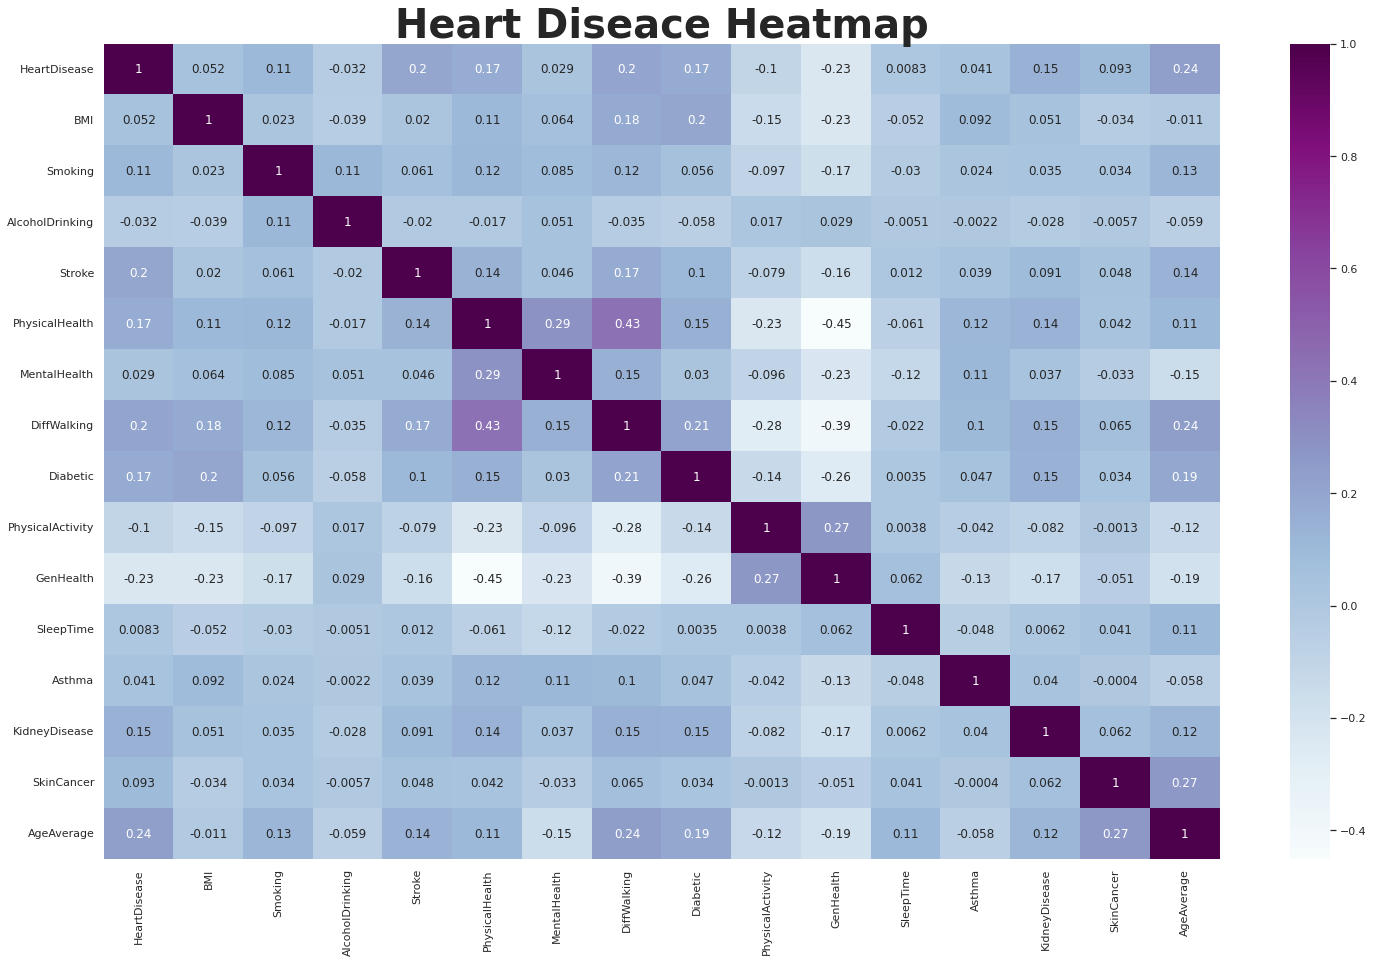

In [ ]:
chartReset()
sns.set_context('notebook')
plt.figure(figsize=(25, 15))
heartDataCorrelations = heartData.corr()
sns.heatmap(heartDataCorrelations, cmap="BuPu", annot=True)
plt.title("Heart Diseace Heatmap", fontsize = 40, fontweight = 'bold')
plt.xlabel("")
plt.ylabel("")
plt.show()

### 4. 資料分割與建置4個分類模型

#### 資料分割

In [ ]:
# Sex、Race
heartData = heartData.drop('AgeCategory', axis=1) # convert to AgeAverage
heartData = heartData.drop('Race', axis=1) # White
heartDataObject = heartData.select_dtypes(include=['object'])
# object get_dummies value
heartData = heartData.drop(list(heartDataObject.columns), axis=1)
NewHeartDataObject = pd.get_dummies(heartDataObject, drop_first=True)
heartData = pd.concat([heartData, NewHeartDataObject], axis=1)

In [ ]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  bool   
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  bool   
 3   AlcoholDrinking   319795 non-null  bool   
 4   Stroke            319795 non-null  bool   
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  bool   
 8   Diabetic          319795 non-null  bool   
 9   PhysicalActivity  319795 non-null  bool   
 10  GenHealth         319795 non-null  float64
 11  SleepTime         319795 non-null  float64
 12  Asthma            319795 non-null  bool   
 13  KidneyDisease     319795 non-null  bool   
 14  SkinCancer        319795 non-null  bool   
 15  AgeAverage        319795 non-null  float64
 16  Sex_Male          31

In [ ]:
from sklearn.model_selection import train_test_split

heartDataX = heartData.drop('HeartDisease', axis=1)
heartDataColumsName = heartData.columns
heartDataY = heartData.drop((heartDataColumsName.drop('HeartDisease')), axis=1)
X_Train, X_test, Y_Train, Y_test = train_test_split(heartDataX, heartDataY, random_state=100, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_Train)
X_Train_std = scaler.transform(X_Train)
X_test_std = scaler.transform(X_test)

#### 模型評估與特徵篩選函式

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

# 繪圖設定重置
def chartResetSmall():
  sns.set()
  sns.set_palette(sns.color_palette(purpleOuO))
  sns.set_style("whitegrid")
  sns.set_context("talk")
  plt.figure(figsize=(8, 6))

# 模型評估函式
def modelScore(predictY, predicty):
  print('訓練集準確率      : ', round(accuracy_score(Y_Train, predictY)*100, 2), " %")
  print('準確率(Accuracy)  : ', round(accuracy_score(Y_test, predicty)*100, 2), " %")
  print('精確率(Precision) : ', round(precision_score(Y_test, predicty)*100, 2), " %")
  print('召回率(Recall)    : ', round(recall_score(Y_test, predicty)*100, 2), " %")
  print('F1-Score          : ', round(f1_score(Y_test, predicty), 2))
  print('分類報告 : \n', classification_report(Y_test, predicty))
  # print('混淆矩陣 : \n', confusion_matrix(Y_test, predicty))

# 混淆矩陣 Confusion Matrix
def CMchart(modelName, model, Xtest, Ytest):
  chartResetSmall()
  class_names = ['True ', 'False']
  disp = plot_confusion_matrix(model, Xtest, Ytest, display_labels=class_names, cmap='BuPu')
  disp.ax_.set_title('%s Confusion Matrix'%(modelName), fontsize=20, fontweight='bold')
  plt.grid()
  plt.show()

# ROC/AUC 曲線
# X軸為假陽率，Y軸為真陽率(Recall)
def ROCchart(modelName, model, Xtest, Ytest):
  chartResetSmall()
  predictions = model.predict_proba(Xtest)
  false_positive_rate, recall, thresholds = roc_curve(Ytest, predictions[:, 1])
  roc_auc = auc(false_positive_rate, recall)
  plt.title('%s ROC/AUC '%(modelName), fontsize=20, fontweight='bold')
  plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0, 1], [0, 1], 'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Fall-out')
  plt.ylabel('Recall')
  plt.show()

def modelReport(modelName, model, Xtest, Ytest, predictY, predicty):
  print("\n\n\n")
  print("========== %s =========="%(modelName))
  print("\n\n")
  modelScore(predictY, predicty)
  print("\n\n\n")
  print("========== %s Confusion Matrix =========="%(modelName))
  print("\n\n")
  CMchart(modelName, model, Xtest, Ytest)
  try:
    print("\n\n\n")
    print("========== %s ROC/AUC =========="%(modelName))
    print("\n\n")
    ROCchart(modelName, model, Xtest, Ytest)
  except:
    print("ROC/AUC can't draw")

In [ ]:
from sklearn.feature_selection import SelectFromModel

def pickedFeatures(modelName, model):
  # 篩選特徵(使用重要性平均值作為門檻)
  modelSelector = SelectFromModel(model)
  modelSelector.fit(X_Train, Y_Train)
  print('\n\n\n門檻值 : ', modelSelector.threshold_)
  print('特徵遮罩 : \n', modelSelector.get_support(),"\n\n\n")
  # 重新訓練
  X_Train_new = modelSelector.transform(X_Train)
  X_test_new = modelSelector.transform(X_test)
  model.fit(X_Train_new, Y_Train)
  model_Y = model.predict(X_Train_new)
  model_y = model.predict(X_test_new)
  # 重新評估
  modelReport(modelName, model, X_test_new, Y_test, model_Y, model_y)

#### 模型建置套件

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Logistic regression(OvR)


In [ ]:
# OvR(One-vs-Rest)策略
OvRModel = LogisticRegression(multi_class='ovr')
OvRModel.fit(X_Train, Y_Train)
OvRModel_Y = OvRModel.predict(X_Train)
OvRModel_y = OvRModel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,






========== OvRModel ==========



訓練集準確率      :  91.53  %
準確率(Accuracy)  :  91.42  %
精確率(Precision) :  51.77  %
召回率(Recall)    :  12.18  %
F1-Score          :  0.2
分類報告 : 
               precision    recall  f1-score   support

       False       0.92      0.99      0.95     58426
        True       0.52      0.12      0.20      5533

    accuracy                           0.91     63959
   macro avg       0.72      0.56      0.58     63959
weighted avg       0.89      0.91      0.89     63959





========== OvRModel Confusion Matrix ==========





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

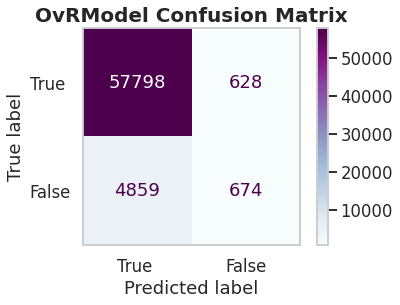





========== OvRModel ROC/AUC ==========





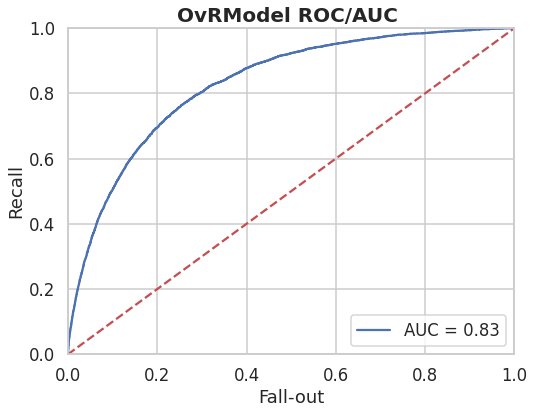

In [ ]:
modelReport('OvRModel', OvRModel, X_test, Y_test, OvRModel_Y, OvRModel_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,





門檻值 :  0.3044870344526064
特徵遮罩 : 
 [False  True  True  True False False False  True False False False False
  True False False  True] 





/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)






========== OvRModel ==========



訓練集準確率      :  91.46  %
準確率(Accuracy)  :  91.39  %
精確率(Precision) :  51.8  %
召回率(Recall)    :  7.54  %
F1-Score          :  0.13
分類報告 : 
               precision    recall  f1-score   support

       False       0.92      0.99      0.95     58426
        True       0.52      0.08      0.13      5533

    accuracy                           0.91     63959
   macro avg       0.72      0.53      0.54     63959
weighted avg       0.88      0.91      0.88     63959





========== OvRModel Confusion Matrix ==========





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

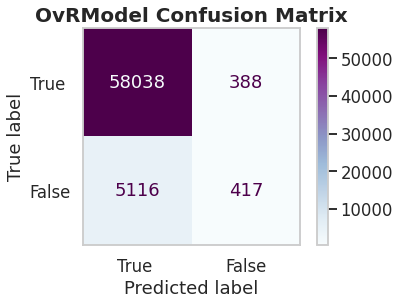





========== OvRModel ROC/AUC ==========





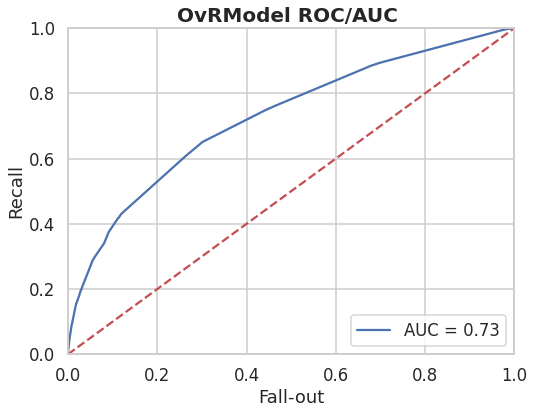

In [ ]:
pickedFeatures('OvRModel', OvRModel)

#### Logistic regression(OvO)


In [ ]:
# OvO(One-vs-One)策略
OvOModel = LogisticRegression(multi_class='multinomial')
OvOModel.fit(X_Train, Y_Train)
OvOModel_Y = OvOModel.predict(X_Train)
OvOModel_y = OvOModel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,






========== OvOModel ==========



訓練集準確率      :  91.56  %
準確率(Accuracy)  :  91.47  %
精確率(Precision) :  53.16  %
召回率(Recall)    :  11.39  %
F1-Score          :  0.19
分類報告 : 
               precision    recall  f1-score   support

       False       0.92      0.99      0.95     58426
        True       0.53      0.11      0.19      5533

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.57     63959
weighted avg       0.89      0.91      0.89     63959





========== OvOModel Confusion Matrix ==========





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

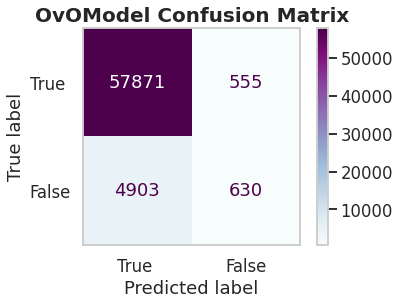





========== OvOModel ROC/AUC ==========





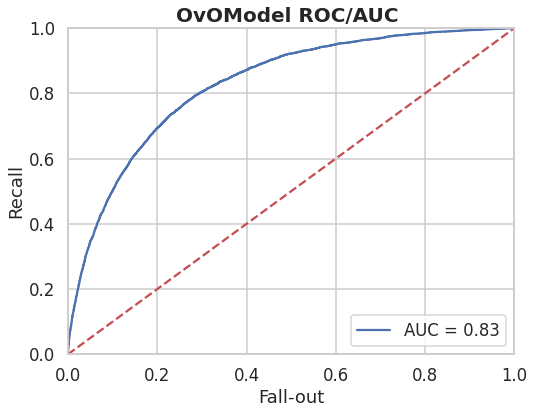

In [ ]:
modelReport('OvOModel', OvOModel, X_test, Y_test, OvOModel_Y, OvOModel_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,





門檻值 :  0.14382424403058408
特徵遮罩 : 
 [False  True  True  True False False False  True False False False False
  True  True False  True] 





/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)






========== OvOModel ==========



訓練集準確率      :  91.5  %
準確率(Accuracy)  :  91.44  %
精確率(Precision) :  54.94  %
召回率(Recall)    :  5.93  %
F1-Score          :  0.11
分類報告 : 
               precision    recall  f1-score   support

       False       0.92      1.00      0.96     58426
        True       0.55      0.06      0.11      5533

    accuracy                           0.91     63959
   macro avg       0.73      0.53      0.53     63959
weighted avg       0.89      0.91      0.88     63959





========== OvOModel Confusion Matrix ==========





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

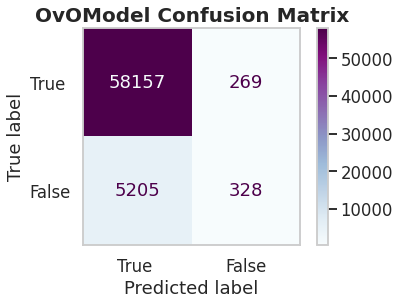





========== OvOModel ROC/AUC ==========





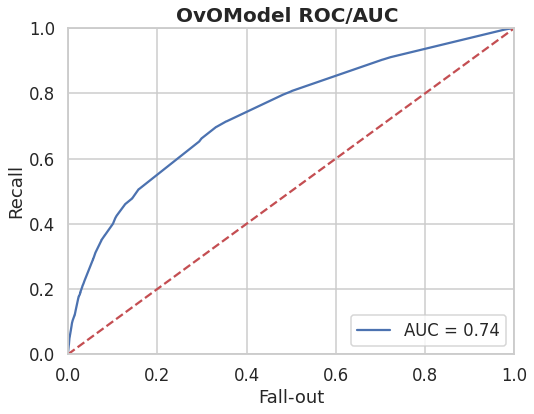

In [ ]:
pickedFeatures('OvOModel', OvOModel)

#### SVM

In [ ]:
svmModel = LinearSVC(max_iter=500)
svmModel.fit(X_Train_std, Y_Train)
svmModel_Y = svmModel.predict(X_Train_std)
svmModel_y = svmModel.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,






========== svmModel ==========



訓練集準確率      :  91.57  %
準確率(Accuracy)  :  91.51  %
精確率(Precision) :  66.03  %
召回率(Recall)    :  3.72  %
F1-Score          :  0.07
分類報告 : 
               precision    recall  f1-score   support

       False       0.92      1.00      0.96     58426
        True       0.66      0.04      0.07      5533

    accuracy                           0.92     63959
   macro avg       0.79      0.52      0.51     63959
weighted avg       0.89      0.92      0.88     63959





========== svmModel Confusion Matrix ==========





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<Figure size 576x432 with 0 Axes>

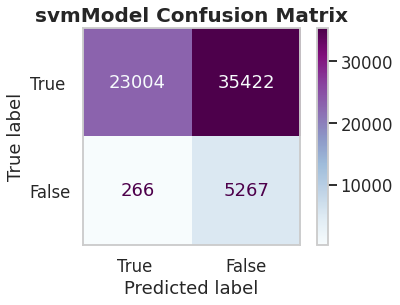





========== svmModel ROC/AUC ==========



ROC/AUC can't draw


<Figure size 576x432 with 0 Axes>

In [ ]:
modelReport('svmModel', svmModel, X_test, Y_test, svmModel_Y, svmModel_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,





門檻值 :  0.07226481849711643
特徵遮罩 : 
 [False  True False  True False False  True  True False False False False
  True False False  True] 





/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)






========== svmModel ==========



訓練集準確率      :  91.54  %
準確率(Accuracy)  :  91.46  %
精確率(Precision) :  62.2  %
召回率(Recall)    :  3.27  %
F1-Score          :  0.06
分類報告 : 
               precision    recall  f1-score   support

       False       0.92      1.00      0.96     58426
        True       0.62      0.03      0.06      5533

    accuracy                           0.91     63959
   macro avg       0.77      0.52      0.51     63959
weighted avg       0.89      0.91      0.88     63959





========== svmModel Confusion Matrix ==========





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

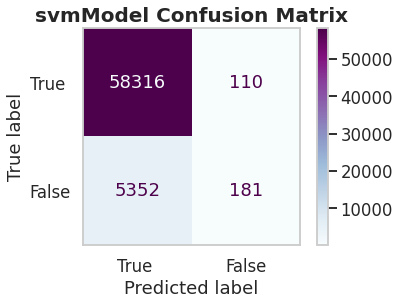





========== svmModel ROC/AUC ==========



ROC/AUC can't draw


<Figure size 576x432 with 0 Axes>

In [ ]:
pickedFeatures('svmModel', svmModel)

#### Random forest

In [ ]:
forestModel = RandomForestClassifier(max_depth=3, n_jobs=-1)
forestModel.fit(X_Train, Y_Train)
forestModel_Y = forestModel.predict(X_Train)
forestModel_y = forestModel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  






========== forestModel ==========



訓練集準確率      :  91.46  %
準確率(Accuracy)  :  91.35  %
精確率(Precision) :  0.0  %
召回率(Recall)    :  0.0  %
F1-Score          :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

分類報告 : 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95     58426
        True       0.00      0.00      0.00      5533

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959





========== forestModel Confusion Matrix ==========





<Figure size 576x432 with 0 Axes>

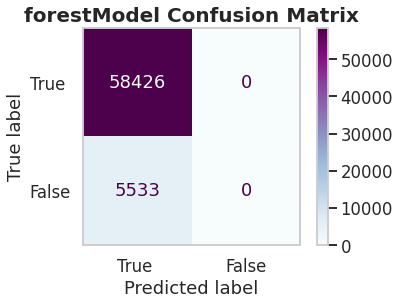





========== forestModel ROC/AUC ==========





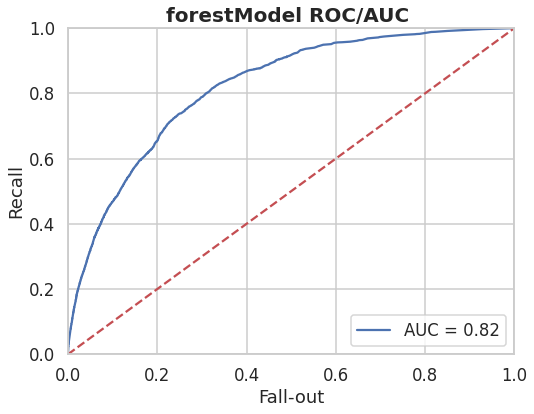

In [ ]:
modelReport('forestModel', forestModel, X_test, Y_test, forestModel_Y, forestModel_y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)





門檻值 :  0.0625
特徵遮罩 : 
 [False False False  True False False  True  True False  True False False
 False False  True False] 





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':






========== forestModel ==========



訓練集準確率      :  91.46  %
準確率(Accuracy)  :  91.35  %
精確率(Precision) :  0.0  %
召回率(Recall)    :  0.0  %
F1-Score          :  0.0
分類報告 : 
               precision    recall  f1-score   support

       False       0.91      1.00      0.95     58426
        True       0.00      0.00      0.00      5533

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959





========== forestModel Confusion Matrix ==========





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

<Figure size 576x432 with 0 Axes>

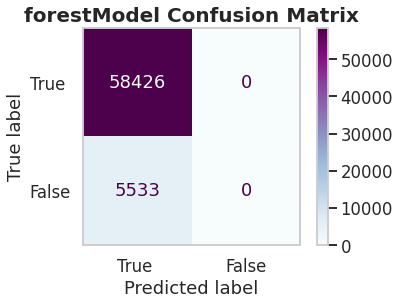





========== forestModel ROC/AUC ==========





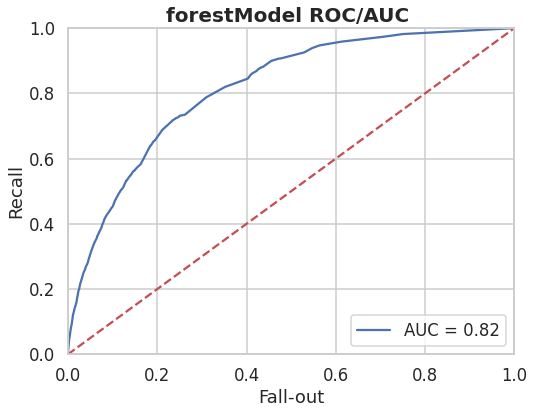

In [ ]:
pickedFeatures('forestModel', forestModel)

#### KNN

In [ ]:
knnModel = KNeighborsClassifier(n_jobs=-1)
knnModel.fit(X_Train_std, Y_Train)
knnModel_Y = knnModel.predict(X_Train_std)
knnModel_y = knnModel.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)






========== knnModel ==========



訓練集準確率      :  92.53  %
準確率(Accuracy)  :  90.6  %
精確率(Precision) :  37.93  %
召回率(Recall)    :  13.68  %
F1-Score          :  0.2
分類報告 : 
               precision    recall  f1-score   support

       False       0.92      0.98      0.95     58426
        True       0.38      0.14      0.20      5533

    accuracy                           0.91     63959
   macro avg       0.65      0.56      0.58     63959
weighted avg       0.88      0.91      0.89     63959





========== knnModel Confusion Matrix ==========





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<Figure size 576x432 with 0 Axes>

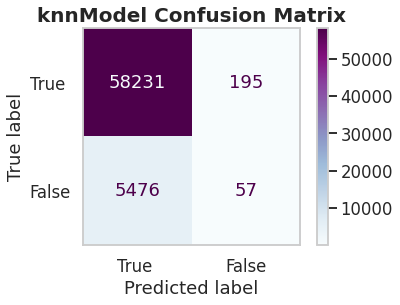





========== knnModel ROC/AUC ==========





/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


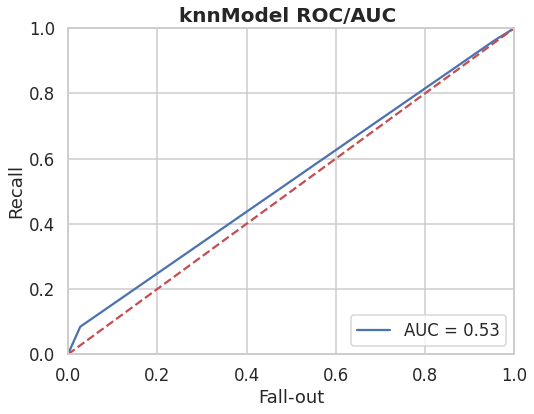

In [ ]:
modelReport('knnModel', knnModel, X_test, Y_test, knnModel_Y, knnModel_y)

### 5. 綜合比較4個模型的分類結果與分析討論

詳見紙本報告OuO